<h1><center> Major Project - Machine Learning </h1></center>

<h3> Problem Statement: To predict the costs of used cars given the data collected from various sources and distributed across various locations in India.</h3>  

In [242]:
import pandas as pd
import numpy as np
data = pd.read_excel('Data_Train.xlsx')
data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [243]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 12 columns):
Name                 6019 non-null object
Location             6019 non-null object
Year                 6019 non-null int64
Kilometers_Driven    6019 non-null int64
Fuel_Type            6019 non-null object
Transmission         6019 non-null object
Owner_Type           6019 non-null object
Mileage              6017 non-null object
Engine               5983 non-null object
Power                5983 non-null object
Seats                5977 non-null float64
Price                6019 non-null float64
dtypes: float64(2), int64(2), object(8)
memory usage: 564.4+ KB


<h3>1. CLean Data</h3>

=> Checking for null values

In [244]:
data.isnull().values.any()

True

In [245]:
data.isnull().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine               36
Power                36
Seats                42
Price                 0
dtype: int64

In [246]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

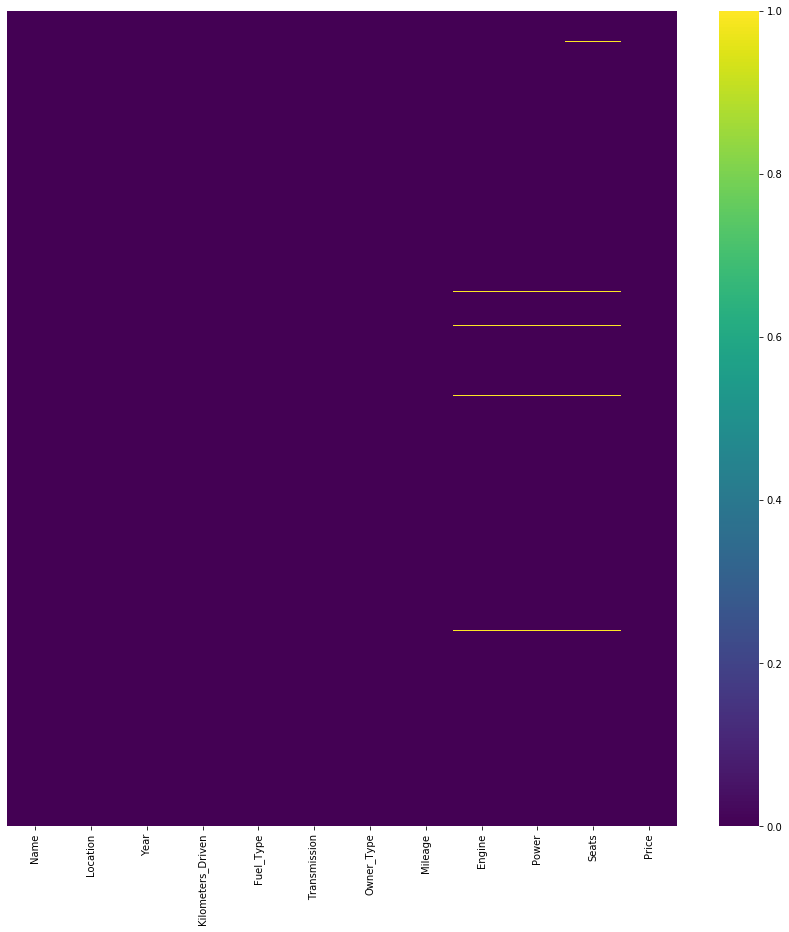

In [247]:
fig = plt.figure(figsize=[15,15])
sns.heatmap(data.isnull(),yticklabels=False,cmap='viridis',linecolor='black')

The Heatmap shows that the presence of null values in the different columns (features).

In [248]:
data[data['Engine'].isnull()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
194,Honda City 1.5 GXI,Ahmedabad,2007,60006,Petrol,Manual,First,0.0 kmpl,NaN,NaN,NaN,2.95
208,Maruti Swift 1.3 VXi,Kolkata,2010,42001,Petrol,Manual,First,16.1 kmpl,NaN,NaN,NaN,2.11
733,Maruti Swift 1.3 VXi,Chennai,2006,97800,Petrol,Manual,Third,16.1 kmpl,NaN,NaN,NaN,1.75
749,Land Rover Range Rover 3.0 D,Mumbai,2008,55001,Diesel,Automatic,Second,0.0 kmpl,NaN,NaN,NaN,26.50
1294,Honda City 1.3 DX,Delhi,2009,55005,Petrol,Manual,First,12.8 kmpl,NaN,NaN,NaN,3.20
1327,Maruti Swift 1.3 ZXI,Hyderabad,2015,50295,Petrol,Manual,First,16.1 kmpl,NaN,NaN,NaN,5.80
1385,Honda City 1.5 GXI,Pune,2004,115000,Petrol,Manual,Second,0.0 kmpl,NaN,NaN,NaN,1.50
1460,Land Rover Range Rover Sport 2005 2012 Sport,Coimbatore,2008,69078,Petrol,Manual,First,0.0 kmpl,NaN,NaN,NaN,40.88
2074,Maruti Swift 1.3 LXI,Pune,2011,24255,Petrol,Manual,First,16.1 kmpl,NaN,NaN,NaN,3.15
2096,Hyundai Santro LP zipPlus,Coimbatore,2004,52146,Petrol,Manual,First,0.0 kmpl,NaN,NaN,NaN,1.93


<h3>2. Null Values(Dropping the rows /Columns and what is the reason or how you are imputing the null).</h3>

Since the rows that have Engine values as null, are the same ones whose seat and power values are also null (as evident from the above table and the heatmap) and overall account for only 36 entries out of 6019 entries hence these rows should be deleted from the table.

In [249]:
null_rows_engine = [x for x in data[data['Engine'].isnull()].index]
data.drop(null_rows_engine,axis=0,inplace=True)

In [250]:
data.isnull().sum() #Checking for remaining null values.

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              2
Engine               0
Power                0
Seats                6
Price                0
dtype: int64

Imputing the seats null value to the mode of the seats values (because the data type of seats is object and if mean is used then it might fill it with a fractional value which cant be a value for seats).

In [251]:
from scipy import stats
mode_stats = stats.mode(data.Seats)
print(mode_stats)

ModeResult(mode=array([5.]), count=array([5014]))


In [252]:
mode = float(mode_stats[0])
data['Seats'].fillna(mode,inplace=True)

In [253]:
data.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              2
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

The mileage colume has only 2 null values rows hence its better to drop these rows.

In [254]:
null_rows_mileage = [x for x in data[data['Mileage'].isnull()].index]
data.drop(null_rows_mileage,axis=0,inplace=True)

In [255]:
data.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

Now the data is free of null values.

=> To Convert the necessary object columns to numerical columns.

In [256]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5981 entries, 0 to 6018
Data columns (total 12 columns):
Name                 5981 non-null object
Location             5981 non-null object
Year                 5981 non-null int64
Kilometers_Driven    5981 non-null int64
Fuel_Type            5981 non-null object
Transmission         5981 non-null object
Owner_Type           5981 non-null object
Mileage              5981 non-null object
Engine               5981 non-null object
Power                5981 non-null object
Seats                5981 non-null float64
Price                5981 non-null float64
dtypes: float64(2), int64(2), object(8)
memory usage: 607.4+ KB


In [257]:
def convert_to_numerical(data,col):
    column = [float(x[:x.index(' ')]) if x[:x.index(' ')]!='null' else 0.0 for x in data[col]]
    data[col] = column

In [258]:
for col in ['Mileage','Engine','Power']:
    convert_to_numerical(data,col)

Logic : The function takes two arguments, the dataframe and the object column which is required to be converted to numerical columns. It then has a column list that uses list comprehension to convert the values from string to float:-<br>
for each value (x) in the column, slice the value until the first index of blank space (' ') and then convert it to float.<br>
(The if x[:x.index(' ')]!='null' else 0.0 part is added because the Power column has a few values as 'null bhp' which is being converted to 0.0)

In [259]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5981 entries, 0 to 6018
Data columns (total 12 columns):
Name                 5981 non-null object
Location             5981 non-null object
Year                 5981 non-null int64
Kilometers_Driven    5981 non-null int64
Fuel_Type            5981 non-null object
Transmission         5981 non-null object
Owner_Type           5981 non-null object
Mileage              5981 non-null float64
Engine               5981 non-null float64
Power                5981 non-null float64
Seats                5981 non-null float64
Price                5981 non-null float64
dtypes: float64(5), int64(2), object(5)
memory usage: 607.4+ KB


All the necessary object columns have been converted to numerical columns.

=>Outlier Detection

In [260]:
data[data['Mileage']==0.0].head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
14,Land Rover Freelander 2 TD4 SE,Pune,2012,85000,Diesel,Automatic,Second,0.0,2179.0,115.0,5.0,17.50
67,Mercedes-Benz C-Class Progressive C 220d,Coimbatore,2019,15369,Diesel,Automatic,First,0.0,1950.0,194.0,5.0,35.67
79,Hyundai Santro Xing XL,Hyderabad,2005,87591,Petrol,Manual,First,0.0,1086.0,0.0,5.0,1.30
229,Ford Figo Diesel,Bangalore,2015,70436,Diesel,Manual,First,0.0,1498.0,99.0,5.0,3.60
262,Hyundai Santro Xing XL,Hyderabad,2006,99000,Petrol,Manual,First,0.0,1086.0,0.0,5.0,1.75


In [261]:
data[data['Power']==0.0].head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
76,Ford Fiesta 1.4 SXi TDCi,Jaipur,2008,111111,Diesel,Manual,First,17.8,1399.0,0.0,5.0,2.00
79,Hyundai Santro Xing XL,Hyderabad,2005,87591,Petrol,Manual,First,0.0,1086.0,0.0,5.0,1.30
89,Hyundai Santro Xing XO,Hyderabad,2007,73745,Petrol,Manual,First,17.0,1086.0,0.0,5.0,2.10
120,Hyundai Santro Xing XL eRLX Euro III,Mumbai,2005,102000,Petrol,Manual,Second,17.0,1086.0,0.0,5.0,0.85
143,Hyundai Santro Xing XO eRLX Euro II,Kochi,2008,80759,Petrol,Manual,Third,17.0,1086.0,0.0,5.0,1.67


Clearly the Mileage and Power of a car cannot be 0.0 hence these must be imputed to the mean of the values of the column.

In [262]:
mean_mileage = data['Mileage'].mean()
new_mileage = [x if x!=0.0 else mean_mileage for x in data['Mileage']]
data['Mileage'] = new_mileage

In [263]:
mean_power = data['Power'].mean()
new_power = [x if x!=0.0 else mean_power for x in data['Power']]
data['Power'] = new_power

<h3>3.EDA</h3>

In [264]:
data.describe()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
count,5981.000000,5.981000e+03,5981.000000,5981.000000,5981.00000,5981.000000,5981.000000
mean,2013.383046,5.868809e+04,18.348479,1621.505935,113.23595,5.278549,9.495133
std,3.249323,9.151838e+04,4.160875,601.117630,53.38984,0.808601,11.202164
min,1998.000000,1.710000e+02,6.400000,624.000000,34.20000,0.000000,0.440000
25%,2011.000000,3.393100e+04,15.400000,1198.000000,77.00000,5.000000,3.500000
50%,2014.000000,5.300000e+04,18.175265,1493.000000,98.60000,5.000000,5.650000
75%,2016.000000,7.300000e+04,21.100000,1984.000000,138.10000,5.000000,9.950000
max,2019.000000,6.500000e+06,33.540000,5998.000000,560.00000,10.000000,160.000000


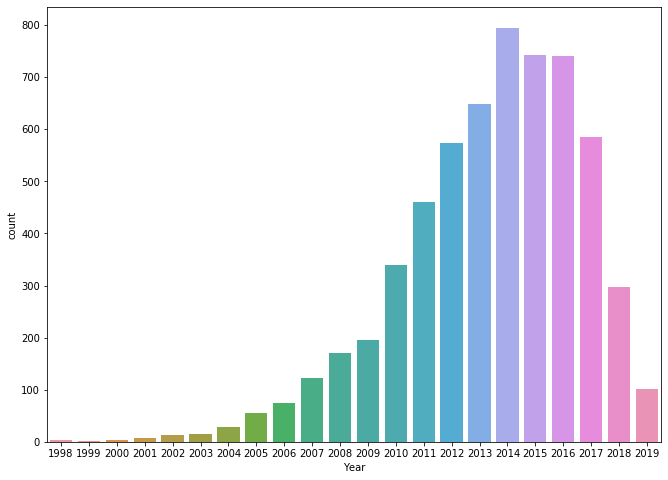

In [265]:
fig = plt.figure(figsize=[11,8])
sns.countplot('Year',data=data)

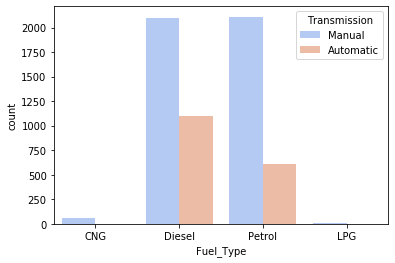

In [266]:
sns.countplot('Fuel_Type',data=data,hue='Transmission',palette='coolwarm')

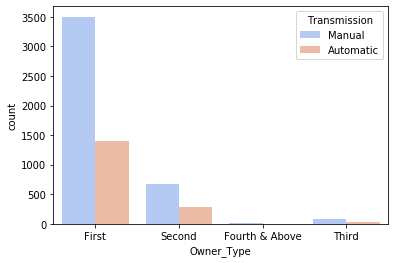

In [267]:
sns.countplot('Owner_Type',data=data,hue='Transmission',palette='coolwarm')

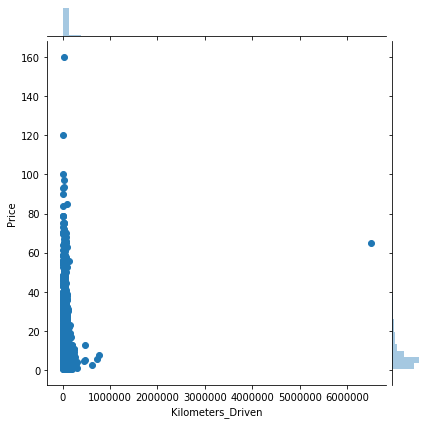

In [268]:
sns.jointplot(x='Kilometers_Driven',y='Price',data=data,ratio=10)

There is an outlier data point in the kilometers driven feature as can be inferred from the above graph.

In [269]:
outlier = data['Kilometers_Driven'].max()
print(outlier)

6500000


In [270]:
data[data['Kilometers_Driven']==outlier]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
2328,BMW X5 xDrive 30d M Sport,Chennai,2017,6500000,Diesel,Automatic,First,15.97,2993.0,258.0,5.0,65.0


Lets replace the value of the Kilometers Driven in this row to the median of the column (using mean isnt considered as the presence of the outlier will affect the mean and result in a high value).

In [271]:
row = data[data['Kilometers_Driven']==outlier].index
data.loc[row,'Kilometers_Driven'] = data['Kilometers_Driven'].median()

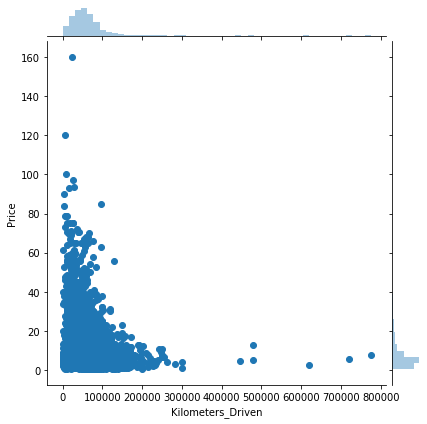

In [272]:
sns.jointplot(x='Kilometers_Driven',y='Price',data=data,ratio=10)

The graph shows that when the kilometers driven feature of the car is low it generally has a high price as compared to when the kilometers driven is high.

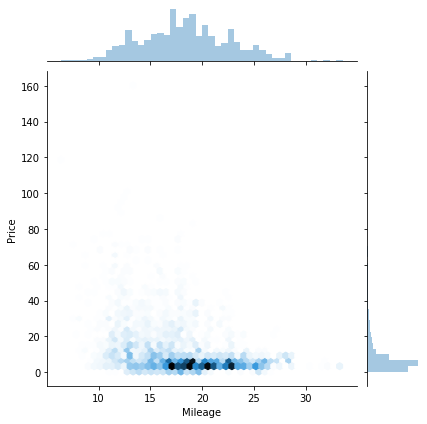

In [273]:
sns.jointplot(x='Mileage',y='Price',data=data,kind='hex')

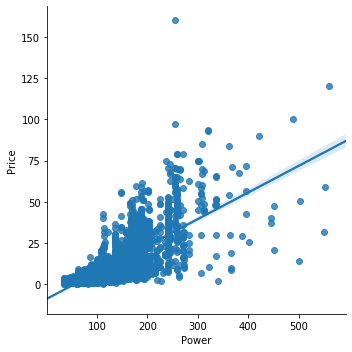

In [274]:
sns.lmplot(x='Power',y='Price',data=data)

The graph shows that as the Power of the car increases the car has a higher price.

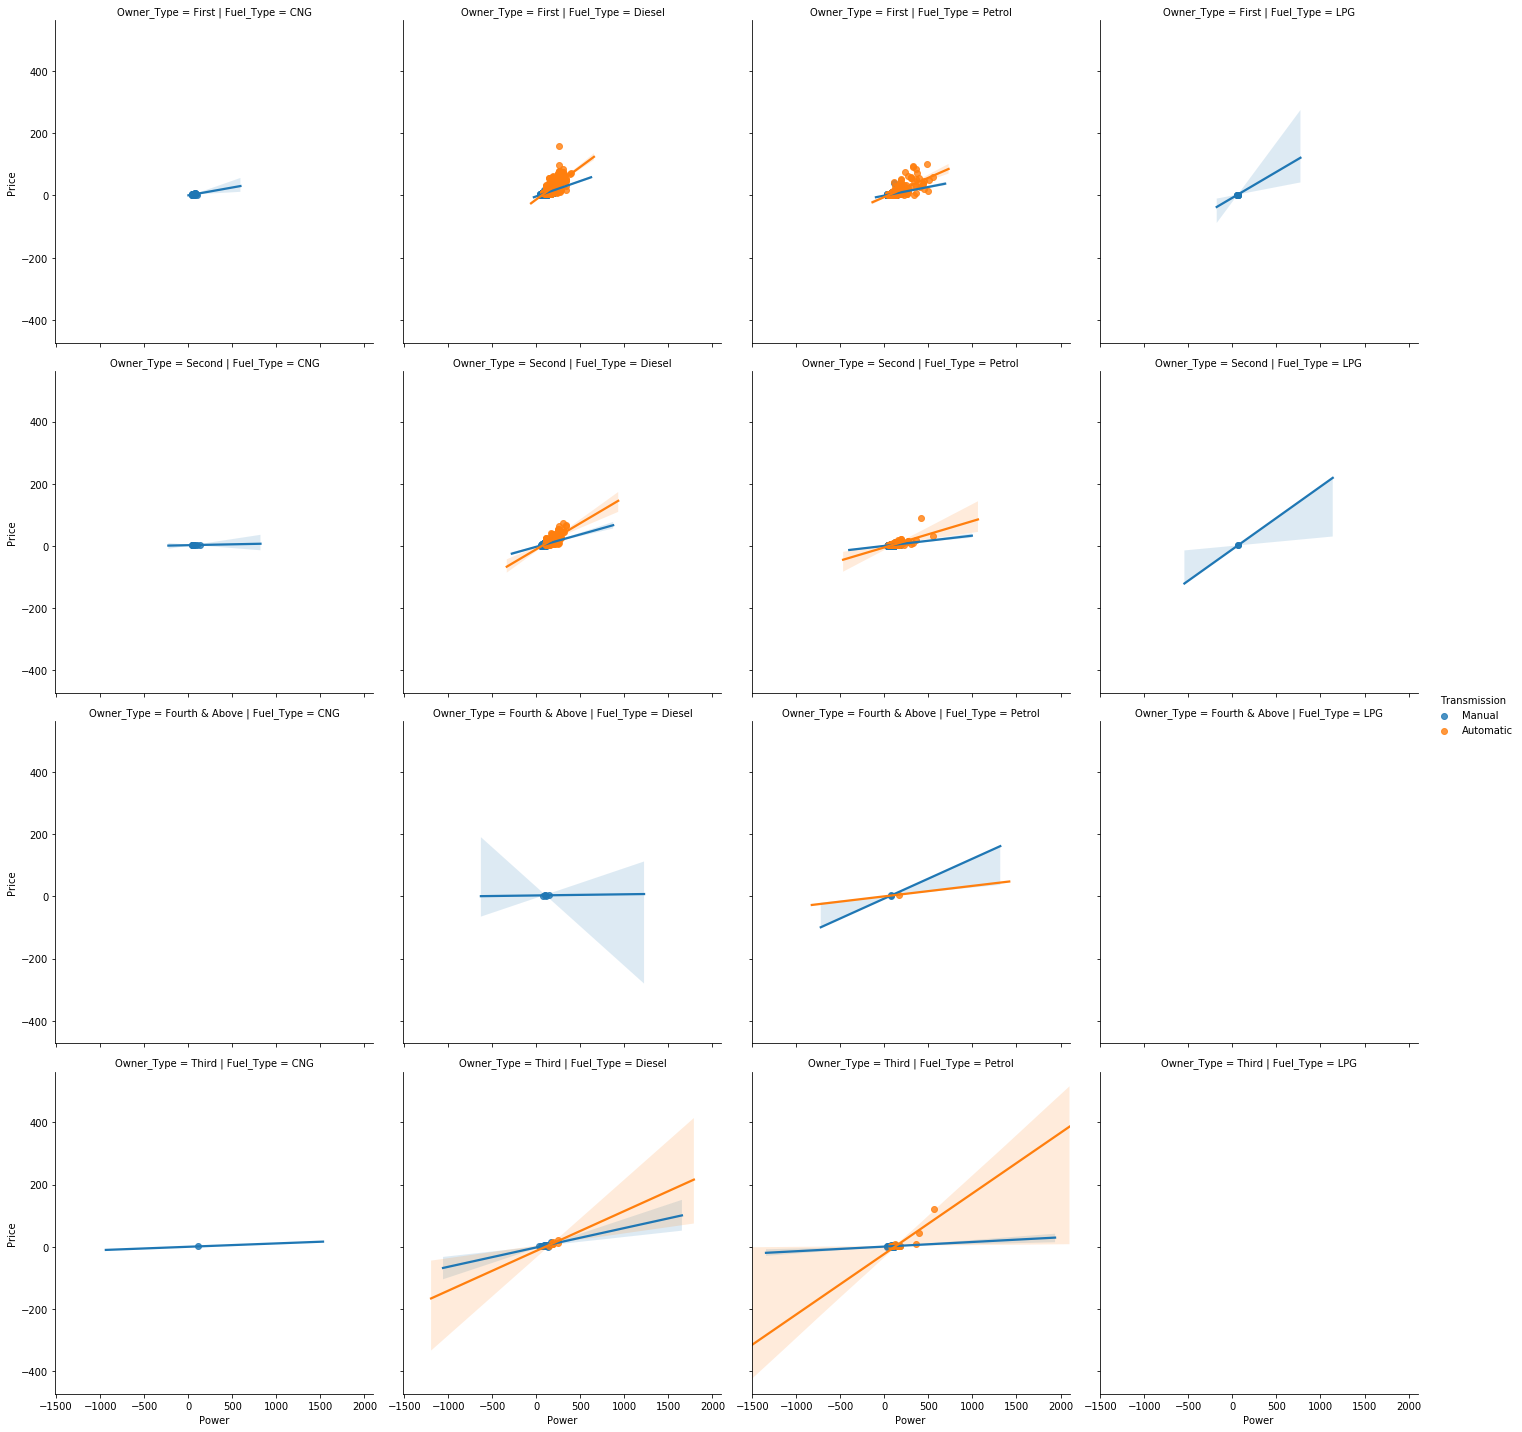

In [275]:
sns.lmplot(x='Power',y='Price',data=data,hue='Transmission',row='Owner_Type',col='Fuel_Type')

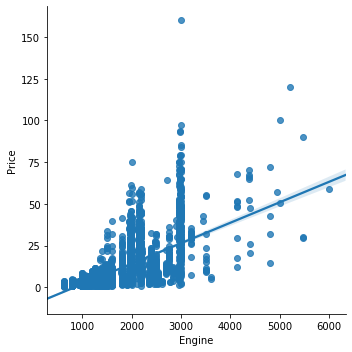

In [276]:
sns.lmplot(x='Engine',y='Price',data=data)

As the Engine capacity of the car incrases the cas's price also increases.

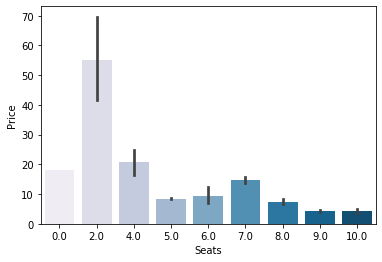

In [277]:
sns.barplot(x='Seats',y='Price',data=data,palette='PuBu')

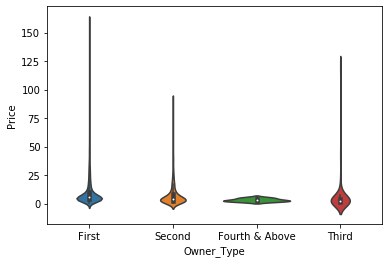

In [278]:
sns.violinplot(x='Owner_Type',y='Price',data=data)

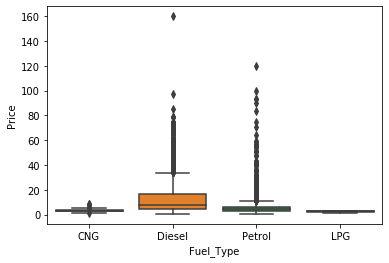

In [279]:
sns.boxplot(x='Fuel_Type',y='Price',data=data)

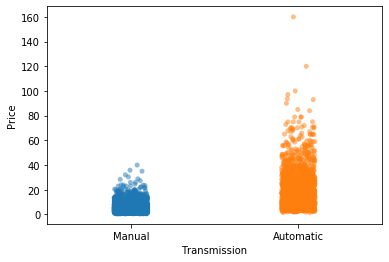

In [280]:
sns.stripplot(x='Transmission',y='Price',data=data,alpha=0.5)

Automatic transmission genearlly have a higher price than manual transmission cars.

<h3>4.Handle Categorical Variable</h3>

In [281]:
brands = [i[:i.index(' ')] for i in data['Name']]
data['Brand'] = brands

In [282]:
data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000.0,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,Maruti
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000.0,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,Hyundai
2,Honda Jazz V,Chennai,2011,46000.0,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,Honda
3,Maruti Ertiga VDI,Chennai,2012,87000.0,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,Maruti
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670.0,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,Audi


In [283]:
data['Brand'].value_counts()

Maruti           1200
Hyundai          1100
Honda             602
Toyota            409
Mercedes-Benz     318
Volkswagen        315
Ford              300
Mahindra          271
BMW               262
Audi              236
Tata              186
Skoda             173
Renault           145
Chevrolet         121
Nissan             91
Land               57
Jaguar             40
Mitsubishi         27
Mini               26
Fiat               25
Volvo              21
Porsche            18
Jeep               15
Datsun             13
Force               3
ISUZU               2
Lamborghini         1
Isuzu               1
Smart               1
Ambassador          1
Bentley             1
Name: Brand, dtype: int64

In [293]:
brand_mean_prices = data.groupby(['Brand'])['Price'].mean().sort_values()
brand_mean_prices

Brand
Ambassador         1.350000
Smart              3.000000
Chevrolet          3.044463
Datsun             3.049231
Fiat               3.340800
Tata               3.562849
Maruti             4.532175
Nissan             4.738352
Volkswagen         5.307270
Hyundai            5.363673
Honda              5.424751
Renault            5.799034
Ford               6.889400
Skoda              7.559075
Mahindra           8.027638
Force              9.333333
Mitsubishi        11.058889
Toyota            11.598264
ISUZU             12.045000
Jeep              18.718667
Volvo             18.802857
Isuzu             20.000000
BMW               25.439618
Audi              25.537712
Mercedes-Benz     26.809874
Mini              26.896923
Jaguar            37.632250
Land              39.861053
Porsche           48.348333
Bentley           59.000000
Lamborghini      120.000000
Name: Price, dtype: float64

In [295]:
brand_list_order = [i for i in brand_mean_prices.index]
brand_list_order

['Ambassador',
 'Smart',
 'Chevrolet',
 'Datsun',
 'Fiat',
 'Tata',
 'Maruti',
 'Nissan',
 'Volkswagen',
 'Hyundai',
 'Honda',
 'Renault',
 'Ford',
 'Skoda',
 'Mahindra',
 'Force',
 'Mitsubishi',
 'Toyota',
 'ISUZU',
 'Jeep',
 'Volvo',
 'Isuzu',
 'BMW',
 'Audi',
 'Mercedes-Benz',
 'Mini',
 'Jaguar',
 'Land',
 'Porsche',
 'Bentley',
 'Lamborghini']

In [285]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [286]:
transmission = data['Transmission']
encoder.fit(transmission)
encoder.classes_

array(['Automatic', 'Manual'], dtype=object)

In [287]:
transmission = encoder.transform(transmission)
data['Transmission'] = transmission

In [288]:
owner_type = data['Owner_Type']
encoder.fit(owner_type)
encoder.classes_ 

array(['First', 'Fourth & Above', 'Second', 'Third'], dtype=object)

The classes of this encoder arent in the right order hence that has to be changed before transforming the data.

In [289]:
new_order = [0,2,3,1]
encoder.classes_ = encoder.classes_[new_order]
encoder.classes_

array(['First', 'Second', 'Third', 'Fourth & Above'], dtype=object)

In [290]:
owner_type = encoder.transform(owner_type)
data['Owner_Type'] = owner_type

In [291]:
fuel_type = data['Fuel_Type']
encoder.fit(fuel_type)
encoder.classes_

array(['CNG', 'Diesel', 'LPG', 'Petrol'], dtype=object)

In [292]:
new_order = [1,3,0,2]
encoder.classes_ = encoder.classes_[new_order]
encoder.classes_

array(['Diesel', 'Petrol', 'CNG', 'LPG'], dtype=object)

In [296]:
fuel_type = encoder.transform(fuel_type)
data['Fuel_Type'] = fuel_type

In [297]:
brands = data['Brand']
encoder.fit(brands)
encoder.classes_

array(['Ambassador', 'Audi', 'BMW', 'Bentley', 'Chevrolet', 'Datsun',
       'Fiat', 'Force', 'Ford', 'Honda', 'Hyundai', 'ISUZU', 'Isuzu',
       'Jaguar', 'Jeep', 'Lamborghini', 'Land', 'Mahindra', 'Maruti',
       'Mercedes-Benz', 'Mini', 'Mitsubishi', 'Nissan', 'Porsche',
       'Renault', 'Skoda', 'Smart', 'Tata', 'Toyota', 'Volkswagen',
       'Volvo'], dtype=object)

In [299]:
encoder.classes_ = brand_list_order
encoder.classes_

['Ambassador',
 'Smart',
 'Chevrolet',
 'Datsun',
 'Fiat',
 'Tata',
 'Maruti',
 'Nissan',
 'Volkswagen',
 'Hyundai',
 'Honda',
 'Renault',
 'Ford',
 'Skoda',
 'Mahindra',
 'Force',
 'Mitsubishi',
 'Toyota',
 'ISUZU',
 'Jeep',
 'Volvo',
 'Isuzu',
 'BMW',
 'Audi',
 'Mercedes-Benz',
 'Mini',
 'Jaguar',
 'Land',
 'Porsche',
 'Bentley',
 'Lamborghini']

In [300]:
brands = encoder.transform(brands)
data['Brand'] = brands

In [301]:
data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000.0,2,1,0,26.60,998.0,58.16,5.0,1.75,6
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000.0,0,1,0,19.67,1582.0,126.20,5.0,12.50,9
2,Honda Jazz V,Chennai,2011,46000.0,1,1,0,18.20,1199.0,88.70,5.0,4.50,10
3,Maruti Ertiga VDI,Chennai,2012,87000.0,0,1,0,20.77,1248.0,88.76,7.0,6.00,6
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670.0,0,0,1,15.20,1968.0,140.80,5.0,17.74,23


The categorical columns have been label encoded to numeric values.

In [302]:
corr_matrix = data.corr()
corr_matrix

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand
Year,1.000000,-0.448401,-0.117403,-0.096235,-0.395276,0.291518,-0.051848,0.015182,0.012719,0.306166,0.024207
Kilometers_Driven,-0.448401,1.000000,-0.215373,0.106943,0.216995,-0.138282,0.155058,0.003163,0.210327,-0.168248,0.011484
Fuel_Type,-0.117403,-0.215373,1.000000,0.146385,0.043138,-0.071884,-0.426679,-0.296186,-0.299350,-0.315586,-0.341861
Transmission,-0.096235,0.106943,0.146385,1.000000,0.009742,0.360900,-0.501474,-0.641757,0.075201,-0.586033,-0.626094
Owner_Type,-0.395276,0.216995,0.043138,0.009742,1.000000,-0.151353,0.050768,0.024814,0.013631,-0.097679,0.017708
Mileage,0.291518,-0.138282,-0.071884,0.360900,-0.151353,1.000000,-0.640760,-0.549007,-0.342450,-0.331909,-0.482501
Engine,-0.051848,0.155058,-0.426679,-0.501474,0.050768,-0.640760,1.000000,0.859376,0.393219,0.658855,0.722192
Power,0.015182,0.003163,-0.296186,-0.641757,0.024814,-0.549007,0.859376,1.000000,0.100355,0.769389,0.759640
Seats,0.012719,0.210327,-0.299350,0.075201,0.013631,-0.342450,0.393219,0.100355,1.000000,0.052450,0.118578
Price,0.306166,-0.168248,-0.315586,-0.586033,-0.097679,-0.331909,0.658855,0.769389,0.052450,1.000000,0.712917


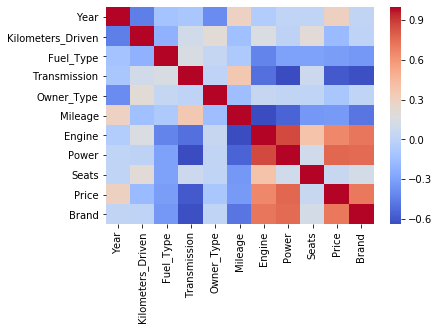

In [303]:
sns.heatmap(corr_matrix,cmap='coolwarm')

<h3>5. Feature Scaling</h3>

In [304]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [305]:
x = data.loc[:,'Year':'Brand'].drop('Price',axis=1)
y = data['Price']

In [306]:
x = scaler.fit_transform(x)

<h3>6.Train Test Split</h3>

In [307]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state=42)

<h3>7.Machine Learning Algorithms (Regresssion)</h3>

In [308]:
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import GridSearchCV

In [309]:
#function to use grid seach to find the best parameters of a model
def get_best_para(model,parameters,x,y):
    grid_search = GridSearchCV(estimator=model,param_grid=parameters,cv=5,n_jobs=-1)
    grid_search.fit(x,y)
    return grid_search.best_params_

In [310]:
#function to check the performance of a model on the train data
def performance_on_train_data(model,y,y_predict):
    mse_train = mean_squared_error(y,y_predict) # mse on train data 
    rmse_train = np.sqrt(mse_train) # root mean squared error of train data
    print('Performance of',model,'on train data :-')
    print('Root mean squared error =',rmse_train)
    print('R-squared value =',r2_score(y,y_predict))

<h4>Linear Regression</h4>

In [311]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x_train,y_train) # Training the linear regression model on the train set

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [312]:
y_train_predict_lr = lin_reg.predict(x_train) # Computing predictions for the train set

In [313]:
#To check the performance on the train data
performance_on_train_data('Linear Regression',y_train,y_train_predict_lr)

Performance of Linear Regression on train data :-
Root mean squared error = 5.962774796371882
R-squared value = 0.7191492473613518


In [314]:
#Function to show learning curves of the model
def plot_learning_curves(model, X, Y):
    X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], Y_train[:m])
        Y_train_predict = model.predict(X_train[:m])
        Y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(Y_train[:m],Y_train_predict))
        val_errors.append(mean_squared_error(Y_val, Y_val_predict))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.title("Learning Curves")
    plt.xlabel("Training set size")
    plt.ylabel("RMSE")
    plt.legend()
    plt.show()

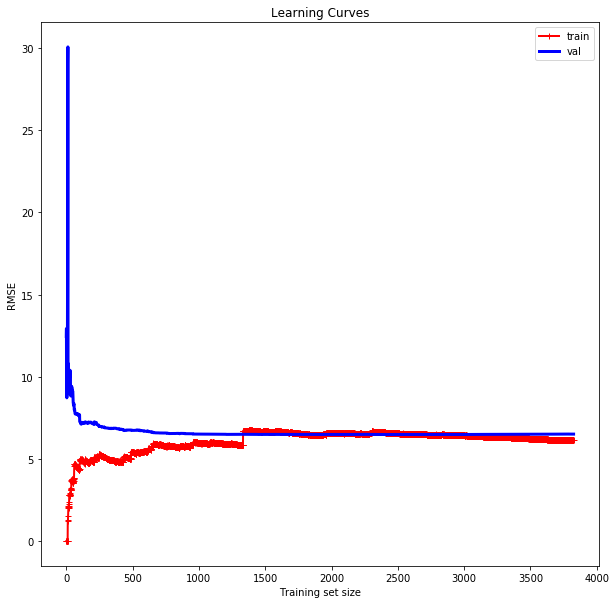

In [211]:
#To plot the learning curve for the Linear Regression Model
fig = plt.figure(figsize=[10,10])
plot_learning_curves(lin_reg,x_train,y_train)

<h4>Stochastic Gradiant Desent</h3>

In [315]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(random_state=42)
sgd_reg.fit(x_train,y_train) # Training the sgd regressor model on the train set

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=42,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [316]:
y_train_predict_sgd = sgd_reg.predict(x_train) # Computing predictions for the train set

In [317]:
#To check the performance on the train data
performance_on_train_data('SGD Regressor',y_train,y_train_predict_sgd)

Performance of SGD Regressor on train data :-
Root mean squared error = 5.975366792013858
R-squared value = 0.717961811753807


<h4>Polynomial Regression</h4>

In [318]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
poly_reg = Pipeline([('poly',PolynomialFeatures()),('lin_reg',LinearRegression())])
parameter = [{'poly__degree':[1,2,3,4]}]
get_best_para(poly_reg,parameter,x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'poly__degree': 2}

In [319]:
poly_reg = Pipeline([('poly',PolynomialFeatures(degree=2)),('lin_reg',LinearRegression())])
poly_reg.fit(x_train,y_train)# Training the polynomial regressor model on the train set

Pipeline(memory=None,
         steps=[('poly',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=False, order='C')),
                ('lin_reg',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [320]:
y_train_predict_poly = poly_reg.predict(x_train)# Computing predictions for the train set

In [321]:
#To check the performance on the train data
performance_on_train_data('Polynomial Regressor',y_train,y_train_predict_poly)

Performance of Polynomial Regressor on train data :-
Root mean squared error = 3.866079376982333
R-squared value = 0.881935233924999


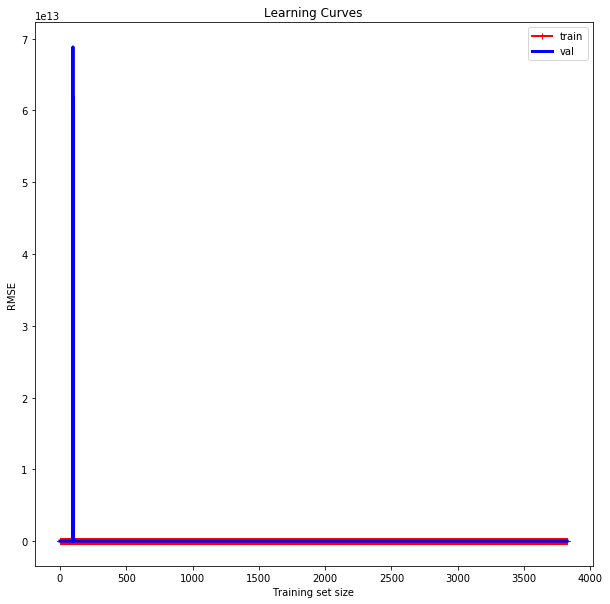

In [71]:
fig = plt.figure(figsize=[10,10])
plot_learning_curves(poly_reg,x_train,y_train)

<h4>Support Vector Machine Regression</h4>

In [322]:
from sklearn.svm import SVR
parameters = [{'kernel':['poly'],'degree':[1,2,3,4]}]
get_best_para(SVR(gamma='auto'),parameters,x_train,y_train)

{'degree': 3, 'kernel': 'poly'}

In [323]:
svm_reg = SVR(kernel='poly',degree=3,coef0=1, C=10,gamma='auto')
svm_reg.fit(x_train,y_train)# Training the SVM regressor model on the train set

SVR(C=10, cache_size=200, coef0=1, degree=3, epsilon=0.1, gamma='auto',
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [324]:
y_train_predict_svr = svm_reg.predict(x_train)# Computing predictions for the train set

In [325]:
#To check the performance on the train data
performance_on_train_data('Support Vector Regressor',y_train,y_train_predict_svr)

Performance of Support Vector Regressor on train data :-
Root mean squared error = 3.4524851561916177
R-squared value = 0.9058452102556535


<h4>K Neighbors Regressor</h4>

In [326]:
from sklearn.neighbors import KNeighborsRegressor
parameter = [{'n_neighbors':[1,2,3,4,5,6,7,8,9]}] 
get_best_para(KNeighborsRegressor(),parameter,x_train,y_train)

{'n_neighbors': 5}

In [329]:
kn_reg = KNeighborsRegressor(n_neighbors=5)
kn_reg.fit(x_train,y_train)# Training the K Neighbors Regressor model on the train set

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [330]:
y_train_predict_kn = svm_reg.predict(x_train)# Computing predictions for the train set

In [331]:
#To check the performance on the train data
performance_on_train_data('K Neighbors Regressor',y_train,y_train_predict_kn)

Performance of K Neighbors Regressor on train data :-
Root mean squared error = 3.4524851561916177
R-squared value = 0.9058452102556535


<h4>Random Forest Regressor</h4>

In [332]:
from sklearn.ensemble import RandomForestRegressor
parameter = [{'max_depth':[200,225,250,275,300]}]
get_best_para(RandomForestRegressor(n_estimators = 50,n_jobs=-1),parameter,x_train,y_train)

{'max_depth': 200}

In [333]:
rnd_reg = RandomForestRegressor(n_estimators = 50,n_jobs=-1,max_depth=200)
rnd_reg.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=200,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=-1,
                      oob_score=False, random_state=None, verbose=0,
                      warm_start=False)

In [335]:
#Feature Importance
feature_name = data.loc[:,'Year':'Brand'].drop('Price',axis=1).columns
for name,score in zip(feature_name,rnd_reg.feature_importances_):
    print(name,":",score)

Year : 0.16294709084956532
Kilometers_Driven : 0.043090967466748085
Fuel_Type : 0.0023672892774099447
Transmission : 0.0006903670272587749
Owner_Type : 0.0019184015544382379
Mileage : 0.020631572852226512
Engine : 0.042602895380065474
Power : 0.16379214353169758
Seats : 0.007526414492803768
Brand : 0.5544328575677863


In [336]:
y_train_predict_rf = rnd_reg.predict(x_train)

In [337]:
#To check the performance on the train data
performance_on_train_data('Random Forest Regressor',y_train,y_train_predict_rf)

Performance of Random Forest Regressor on train data :-
Root mean squared error = 1.4748119801621082
R-squared value = 0.9828188554599934


<h4>Ensembling the best models together</h4>

In [338]:
from sklearn.ensemble import VotingRegressor,VotingClassifier
voting_reg = VotingRegressor(estimators = [('poly',poly_reg),('svm',svm_reg),('kn',kn_reg),('rf',rnd_reg)],weights=[1,3,4,5])
voting_reg.fit(x_train,y_train)

VotingRegressor(estimators=[('poly',
                             Pipeline(memory=None,
                                      steps=[('poly',
                                              PolynomialFeatures(degree=2,
                                                                 include_bias=True,
                                                                 interaction_only=False,
                                                                 order='C')),
                                             ('lin_reg',
                                              LinearRegression(copy_X=True,
                                                               fit_intercept=True,
                                                               n_jobs=None,
                                                               normalize=False))],
                                      verbose=False)),
                            ('svm',
                             SVR(C=10, cache_size=200, coef0=1, de

In [339]:
y_train_predict = voting_reg.predict(x_train)

In [340]:
#To check the performance on the train data
performance_on_train_data('Ensemble',y_train,y_train_predict)

Performance of Ensemble on train data :-
Root mean squared error = 2.435127389407061
R-squared value = 0.9531594324266607


<h3>Error metrics</h3>

In [341]:
y_test_predict = voting_reg.predict(x_test)
mse_test = mean_squared_error(y_test,y_test_predict)
rmse_test = np.sqrt(mse_test) 
r2_score_test = r2_score(y_test,y_test_predict)
print('Performance of Regression Model on test data :-')
print('Mean Squared error =',mse_test)
print('Root mean squared error =',rmse_test)
print('R-squared value =',r2_score_test)

Performance of Regression Model on test data :-
Mean Squared error = 9.161237679120774
Root mean squared error = 3.0267536535239823
R-squared value = 0.9242595488184574


 -------------------------------------------------------------------------------x--x--x--x--x--x--x--x--x--x-----------------------------------------------------------------------------------------------